<a href="https://colab.research.google.com/github/Vlad4441/Tekwill-Project/blob/main/Cod_model_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cleaning up the data

In [2]:
%reset-f
import tensorflow as tf
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data=pd.read_csv('/content/drive/MyDrive/Machine Learning/Tekwill_final_df.csv')



In [4]:
# finds digits in the labels and transforms to float
import re
def to_float(data):
    data=str(data)
    for i in data:
        x=re.findall('\d', data)
    if int(x[0])==1 and int(x[1])==0:
        return float(10)
    else:
        final_str=x[0]+'.'
        for j in x[1:]:
            final_str+=j
        return float(final_str)
data['Grade']=data['Grade'].apply(to_float)

In [5]:
for col in data.columns:
  print(col)

Sex
Treapta
Profil
Clasa(L)
Clasa(G)
Age
GO OUT
Study time
Trip time
Location
Mom ed
Dad ed
School sup
Mom job
Dad job
Failiures
Health
Attendance
School extra
University
Weekly alcohol
Weekend alcohol
Parents
Internet
Relationship
Grade


In [6]:
# combines to columns and replaces the element in
# the other column with the coresponding index value
import numpy as np
def concat(*args):
  strs = [str(arg) for arg in args if not pd.isnull(arg)]
  return ','.join(strs) if strs else np.nan
np_concat = np.vectorize(concat)

data['Clasa'] = np_concat(data['Clasa(L)'], data['Clasa(G)'])


df=data.drop(columns=['Clasa(G)', 'Clasa(L)'])

In [7]:
# fill missing value

df['Weekly alcohol']=df['Weekly alcohol'].fillna(1)
df['Weekend alcohol']=df['Weekend alcohol'].fillna(1)
# df['Profil']=df.iloc[:, 2].fillna('-')
df['Profil']=df['Profil'].fillna(float(1))

In [8]:
# convert dtypes
df['Grade']=df.Grade.astype('float64')
df['Clasa']=df.Clasa.astype('float64')
df.dtypes

Sex                 object
Treapta             object
Profil              object
Age                  int64
GO OUT               int64
Study time          object
Trip time           object
Location            object
Mom ed              object
Dad ed              object
School sup          object
Mom job             object
Dad job             object
Failiures           object
Health               int64
Attendance           int64
School extra        object
University          object
Weekly alcohol     float64
Weekend alcohol    float64
Parents             object
Internet            object
Relationship        object
Grade              float64
Clasa              float64
dtype: object

In [9]:
# replace the 2 daily alcohol and weekend alcohol columns with their int mean
df["Alcohol"]=(df['Weekly alcohol']+df['Weekend alcohol'])/2
df["Alcohol"]=df.Alcohol.apply(lambda x: int(x))

#Encoding the dataframe (Label encoding and One Hot Encoding)


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [11]:
le = preprocessing.LabelEncoder()

In [12]:

cols=['Study time',  'School sup', 'Mom ed', 'Dad ed', 'Failiures', 'School extra', 'Trip time' ]
for i in cols:
  df[i]=le.fit_transform(df[i])
print(le.classes_)
le.get_params()

['15 - 30 minute' '30 minute - 1 oră' 'mai puțin de 15 minute']


{}

In [13]:
labels=df['Grade']

In [14]:

df=df.drop(['Grade', 'Weekly alcohol', 'Weekend alcohol'], axis=1)



In [15]:
df.dtypes

Sex              object
Treapta          object
Profil           object
Age               int64
GO OUT            int64
Study time        int64
Trip time         int64
Location         object
Mom ed            int64
Dad ed            int64
School sup        int64
Mom job          object
Dad job          object
Failiures         int64
Health            int64
Attendance        int64
School extra      int64
University       object
Parents          object
Internet         object
Relationship     object
Clasa           float64
Alcohol           int64
dtype: object

In [16]:
df_dummies=pd.get_dummies(df)

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# data regularization
scaler = MinMaxScaler()
df_dummies = scaler.fit_transform(df_dummies)
df_dummies=pd.DataFrame(df_dummies)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

(185, 42)

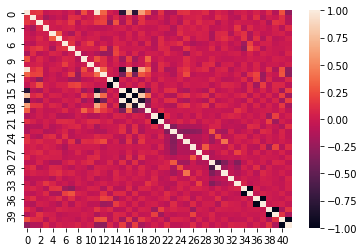

In [19]:
# plot the corelation matrix of the features
corr = df_dummies.corr()
sns.heatmap(corr)
df_dummies.shape

In [20]:
# removes columns with a corelation to each other higher than 0.85

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = df_dummies.columns[columns]
df_dummies= df_dummies[selected_columns]


In [21]:
# see how many columns were dropped (2 in this case)
df_dummies.shape

(185, 40)

In [22]:
df_dummies

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.375,0.50,0.50,1.0,1.0,0.75,0.0,0.0,1.00,0.047170,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.375,0.75,0.25,1.0,1.0,0.75,0.0,0.0,1.00,0.009434,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.375,0.75,0.00,0.0,1.0,0.75,0.0,0.0,1.00,0.018868,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.375,0.50,0.75,0.5,1.0,0.75,0.0,0.0,0.25,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.500,0.50,0.00,0.0,1.0,0.75,0.0,0.0,0.75,0.009434,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.875,0.75,0.50,1.0,1.0,0.75,0.0,0.0,1.00,0.037736,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
181,0.875,0.25,0.50,0.0,1.0,0.75,0.0,0.0,0.25,0.047170,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
182,0.875,0.75,0.50,0.0,1.0,0.75,1.0,0.0,1.00,0.070755,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
183,1.000,0.50,0.75,0.0,1.0,0.75,0.0,0.0,0.75,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [23]:
df_dummies.to_csv('data_21.03')
labels.to_csv('labels_21.03')

In [24]:
labels

0      10.00
1       8.56
2       8.84
3       8.91
4       9.83
       ...  
180     8.16
181     8.00
182     8.00
183     9.00
184     9.43
Name: Grade, Length: 185, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies, labels, test_size=0.1, random_state=7)

#Model 1

In [26]:
# Building the actual model
tf.random.set_seed(17)


model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100, activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(50, activation='relu'),
                           
                           tf.keras.layers.Dense(25, activation='relu'),
                         
                           tf.keras.layers.Dense(1, activation='relu', name='output_layer')

])

# 2.Compile model
model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['mae'])



In [27]:
# 3. FIt the model

history=model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))
# history=model.fit(df_dummies, labels, epochs=700, validation_data=(X_test, y_test))


Epoch 1/400
6/6 [==============================] - 1s 47ms/step - loss: 8.3362 - mae: 8.3362 - val_loss: 7.4586 - val_mae: 7.4586
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 7.3531 - mae: 7.3531 - val_loss: 6.1905 - val_mae: 6.1905
Epoch 3/400
6/6 [==============================] - 0s 8ms/step - loss: 5.8825 - mae: 5.8825 - val_loss: 4.2933 - val_mae: 4.2933
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 3.6696 - mae: 3.6696 - val_loss: 1.6595 - val_mae: 1.6595
Epoch 5/400
6/6 [==============================] - 0s 8ms/step - loss: 1.4111 - mae: 1.4111 - val_loss: 1.6365 - val_mae: 1.6365
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 1.5064 - mae: 1.5064 - val_loss: 0.9267 - val_mae: 0.9267
Epoch 7/400
6/6 [==============================] - 0s 10ms/step - loss: 0.9749 - mae: 0.9749 - val_loss: 0.7940 - val_mae: 0.7940
Epoch 8/400
6/6 [==============================] - 0s 8ms/step - loss: 1.0449 - mae: 1.0449 - v

Text(0.5, 1.0, 'Model loss curve')

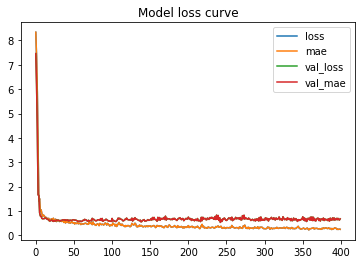

In [28]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.title('Model loss curve')

#Model 2

In [29]:
# Building the actual model
tf.random.set_seed(17)


model_2=tf.keras.Sequential([
                           tf.keras.layers.Dense(200, activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(100, activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(50, activation='relu'),
                          
                           tf.keras.layers.Dense(25, activation='relu'),
                           tf.keras.layers.Dense(1, activation='relu', name='output_layer')

])

# 2.Compile model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(lr=0.003),
    metrics=['mae'])



In [30]:
# 3. FIt the model

history=model_2.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
6/6 [==============================] - 1s 43ms/step - loss: 7.1837 - mae: 7.1837 - val_loss: 0.8960 - val_mae: 0.8960
Epoch 2/400
6/6 [==============================] - 0s 9ms/step - loss: 2.1654 - mae: 2.1654 - val_loss: 1.6245 - val_mae: 1.6245
Epoch 3/400
6/6 [==============================] - 0s 8ms/step - loss: 2.5133 - mae: 2.5133 - val_loss: 0.9641 - val_mae: 0.9641
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 1.4370 - mae: 1.4370 - val_loss: 0.9035 - val_mae: 0.9035
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 1.1287 - mae: 1.1287 - val_loss: 0.7969 - val_mae: 0.7969
Epoch 6/400
6/6 [==============================] - 0s 8ms/step - loss: 1.0343 - mae: 1.0343 - val_loss: 0.7575 - val_mae: 0.7575
Epoch 7/400
6/6 [==============================] - 0s 8ms/step - loss: 0.8680 - mae: 0.8680 - val_loss: 0.7761 - val_mae: 0.7761
Epoch 8/400
6/6 [==============================] - 0s 9ms/step - loss: 0.8435 - mae: 0.8435 - va

#Model 3


In [31]:
# Building the actual model
tf.random.set_seed(17)


model_3=tf.keras.Sequential([
                           tf.keras.layers.Dense(400, activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(200, activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(100, activation='relu'),
                          tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(50, activation='relu'),
                           tf.keras.layers.Dense(1, activation='relu', name='output_layer')

])

# 2.Compile model
model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(lr=0.003),
    metrics=['mae'])



In [32]:
# 3. FIt the model

history=model_3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 1s 43ms/step - loss: 6.1373 - mae: 6.1373 - val_loss: 4.9200 - val_mae: 4.9200
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 2.5434 - mae: 2.5434 - val_loss: 1.8613 - val_mae: 1.8613
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7060 - mae: 1.7060 - val_loss: 0.6660 - val_mae: 0.6660
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 1.6418 - mae: 1.6418 - val_loss: 0.7190 - val_mae: 0.7190
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.9954 - mae: 0.9954 - val_loss: 1.1393 - val_mae: 1.1393
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 1.2255 - mae: 1.2255 - val_loss: 1.0429 - val_mae: 1.0429
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.9829 - mae: 0.9829 - val_loss: 0.6603 - val_mae: 0.6603
Epoch 8/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7646 - mae: 0.7646 -

In [33]:


#transforma numerele mai mari decat 10.0
x=model.predict(X_test)

for i in x:
  if float(i[0]) >10.0:
    i[0]=10.0
print(x)

[[8.84008  ]
 [8.299936 ]
 [7.959287 ]
 [9.257818 ]
 [8.982716 ]
 [8.843243 ]
 [7.773759 ]
 [8.638686 ]
 [8.692669 ]
 [8.8641   ]
 [9.390105 ]
 [7.7067785]
 [9.143471 ]
 [7.224833 ]
 [8.863484 ]
 [8.183072 ]
 [8.458701 ]
 [7.1015534]
 [6.3838234]]
